In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics torch torchvision

from ultralytics import YOLO
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import os

# Define dataset directories
dataset_path = '/content/drive/MyDrive/school'
train_label_path = os.path.join(dataset_path, '/content/drive/MyDrive/school/train/labels')

# Check unique class IDs
class_ids = set()

# Ensure label directory exists
if os.path.exists(train_label_path):
    for label_file in os.listdir(train_label_path):
        label_file_path = os.path.join(train_label_path, label_file)

        # Open each label file and extract class IDs
        with open(label_file_path, 'r') as f:
            for line in f:
                class_id = line.split()[0]  # First column contains the class ID
                class_ids.add(class_id)

# Convert to sorted list
class_ids = sorted(list(class_ids), key=int)

# Print detected classes
print(f"Number of unique classes: {len(class_ids)}")
print(f"Class IDs found: {class_ids}")

# Generate class names dynamically
class_names = [f'class_{i}' for i in range(len(class_ids))]  # Placeholder names

# Save dataset configuration
data_yaml = f"""
path: {dataset_path}
train: {os.path.join(dataset_path, 'train')}
val: {os.path.join(dataset_path, 'valid')}
test: {os.path.join(dataset_path, 'test')}
nc: {len(class_ids)}
names: {class_names}
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)

print("data.yaml generated successfully!")


Number of unique classes: 6
Class IDs found: ['0', '1', '2', '3', '4', '5']
data.yaml generated successfully!


In [ ]:
test_path = '/content/drive/MyDrive/school/test'
valid_images = [f for f in os.listdir(test_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print("🖼 Found images:", valid_images)


🖼 Found images: []


In [ ]:
import os

test_path = "/content/drive/MyDrive/school/test"  # Update this if needed

if os.path.exists(test_path):
    print("✅ Test folder exists")
    print("📂 Files inside:", os.listdir(test_path))
else:
    print("❌ Test folder NOT found! Check the path.")

✅ Test folder exists
📂 Files inside: ['labels', 'images']


In [ ]:
for file in os.listdir(test_path):
    old_path = os.path.join(test_path, file)
    new_path = os.path.join(test_path, file.lower().replace(" ", "_"))
    os.rename(old_path, new_path)
print("✅ File names cleaned!")

✅ File names cleaned!


In [ ]:
dataset_path = '/content/drive/MyDrive/school'

data_yaml = f"""
path: {dataset_path}
train: {os.path.join(dataset_path, 'train')}
val: {os.path.join(dataset_path, 'valid')}
test: {os.path.join(dataset_path, 'test')}
nc: 6 # Number of classes (update this)
names: ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5']
"""

with open("newdata.yaml", "w") as f:
    f.write(data_yaml)

print("✅ data.yaml file generated successfully!")


✅ data.yaml file generated successfully!


In [ ]:
import torch

if torch.cuda.is_available():
    print("✅ GPU is available:", torch.cuda.get_device_name(0))
else:
    print("❌ No GPU found! Training will be slow on CPU.")


✅ GPU is available: Tesla T4


In [ ]:
# Load YOLOv8 model (pre-trained version)
model = YOLO("yolov8n.pt")  # Use yolov8s.pt for better accuracy

# Train the model
model.train(data="/content/newdata.yaml", epochs=25, imgsz=640, batch=16, device="cuda")

print("✅ Model training complete!")


100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/newdata.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

100%|██████████| 755k/755k [00:00<00:00, 21.1MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,012,018 parameters, 3,012,002 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 98.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.1±0.0 MB/s, size: 28.7 KB)


train: Scanning /content/drive/MyDrive/school/train/labels.cache... 1309 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1309/1309 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 29.3 KB)


val: Scanning /content/drive/MyDrive/school/valid/labels.cache... 216 images, 0 backgrounds, 0 corrupt: 100%|██████████| 216/216 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.05G      1.211      2.041      1.245         73        640: 100%|██████████| 82/82 [07:23<00:00,  5.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        216       1295      0.995      0.468      0.878      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.54G      0.961     0.8386      1.047        110        640: 100%|██████████| 82/82 [00:25<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        216       1295      0.946      0.931      0.949      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.54G     0.9361     0.7548      1.037        137        640: 100%|██████████| 82/82 [00:25<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        216       1295      0.948       0.97      0.967      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.55G     0.9287     0.7149      1.029        132        640: 100%|██████████| 82/82 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]

                   all        216       1295      0.947      0.962      0.967      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.55G     0.8821     0.6544      1.012        123        640: 100%|██████████| 82/82 [00:26<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        216       1295       0.96      0.968      0.976      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.55G     0.8572     0.6059          1        127        640: 100%|██████████| 82/82 [00:25<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        216       1295      0.968      0.977      0.977      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.55G     0.8611     0.5772      1.004        166        640: 100%|██████████| 82/82 [00:26<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        216       1295      0.964      0.973      0.976      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.55G     0.8248     0.5477     0.9836         96        640: 100%|██████████| 82/82 [00:25<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        216       1295      0.975      0.981      0.982      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.55G     0.8234     0.5247     0.9812        154        640: 100%|██████████| 82/82 [00:25<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        216       1295      0.978      0.978      0.982      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.55G     0.8145     0.5123     0.9836        146        640: 100%|██████████| 82/82 [00:25<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


                   all        216       1295      0.976      0.979      0.983      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.55G     0.7997     0.4948      0.974        125        640: 100%|██████████| 82/82 [00:25<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        216       1295      0.979      0.979      0.986      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.55G     0.7963     0.4845     0.9726         86        640: 100%|██████████| 82/82 [00:25<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        216       1295      0.971      0.981      0.982      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.55G     0.7854     0.4695      0.969         95        640: 100%|██████████| 82/82 [00:25<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        216       1295      0.979      0.983      0.988      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.57G     0.7634     0.4536     0.9547        100        640: 100%|██████████| 82/82 [00:25<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        216       1295      0.976      0.981      0.987      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.59G      0.778     0.4478     0.9604        132        640: 100%|██████████| 82/82 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        216       1295      0.977      0.976      0.984      0.737


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       2.6G     0.7523     0.4361     0.9512         75        640: 100%|██████████| 82/82 [00:26<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        216       1295      0.979      0.982      0.986      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.61G     0.7399     0.4194     0.9458         76        640: 100%|██████████| 82/82 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all        216       1295       0.98      0.978      0.985       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.62G     0.7341     0.4068     0.9475         75        640: 100%|██████████| 82/82 [00:24<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        216       1295      0.984      0.988      0.989      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.64G      0.721     0.3959     0.9402         74        640: 100%|██████████| 82/82 [00:24<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]

                   all        216       1295      0.983      0.986      0.988      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.66G     0.7085     0.3882     0.9362         75        640: 100%|██████████| 82/82 [00:24<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all        216       1295      0.983      0.987       0.99       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.67G     0.7018     0.3783     0.9289         76        640: 100%|██████████| 82/82 [00:23<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        216       1295      0.983      0.985      0.989      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.69G     0.6958     0.3708     0.9256         75        640: 100%|██████████| 82/82 [00:22<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        216       1295      0.981      0.985       0.99      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.69G     0.6864     0.3622     0.9234         75        640: 100%|██████████| 82/82 [00:23<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        216       1295      0.985      0.986      0.989      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.69G     0.6728     0.3542     0.9206         77        640: 100%|██████████| 82/82 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        216       1295      0.984      0.986      0.989      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.69G     0.6678     0.3507     0.9189         76        640: 100%|██████████| 82/82 [00:22<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        216       1295      0.985      0.988      0.991      0.769



25 epochs completed in 0.309 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


                   all        216       1295      0.985      0.988      0.991      0.769
               class_0        212        214      0.979      0.991      0.993      0.764
               class_1        216        220      0.997      0.982      0.994      0.769
               class_2        216        218      0.997      0.991      0.995      0.903
               class_3        214        215      0.984      0.991      0.986      0.775
               class_4        213        214      0.967      0.977      0.984      0.462
               class_5        214        214      0.988          1      0.993       0.94
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/train
✅ Model training complete!


In [ ]:
# Validate model performance on validation set
metrics = model.val()
print("✅ Model validation complete!")


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 12.4±7.3 MB/s, size: 28.9 KB)


val: Scanning /content/drive/MyDrive/school/valid/labels.cache... 216 images, 0 backgrounds, 0 corrupt: 100%|██████████| 216/216 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.78it/s]


                   all        216       1295      0.985      0.988      0.991       0.77
               class_0        212        214      0.979      0.991      0.993      0.765
               class_1        216        220      0.997      0.982      0.994      0.774
               class_2        216        218      0.997      0.991      0.995      0.906
               class_3        214        215      0.984      0.991      0.986      0.774
               class_4        213        214      0.967      0.977      0.984      0.461
               class_5        214        214      0.988          1      0.993       0.94
Speed: 2.5ms preprocess, 4.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train2
✅ Model validation complete!


In [ ]:
trained_model_path = "runs/detect/train/weights/best.pt"

if os.path.exists(trained_model_path):
    print("✅ Trained model saved at:", trained_model_path)
else:
    print("❌ Model not found! Check training logs for errors.")


✅ Trained model saved at: runs/detect/train/weights/best.pt


In [ ]:
print(os.listdir("runs/detect/train/weights/"))


['last.pt', 'best.pt']



image 1/1 /content/drive/MyDrive/school/test/images/WIN_20230503_16_58_08_Pro-2-_jpg.rf.12475add2e38134dd1441b19cb558df4.jpg: 640x640 1 class_0, 1 class_1, 1 class_2, 1 class_3, 1 class_4, 1 class_5, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


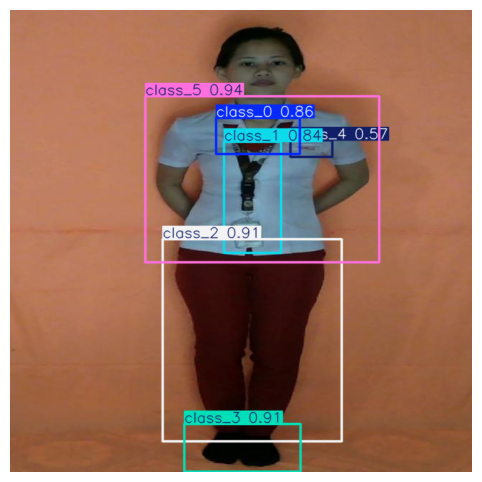

In [ ]:
# Test image path
test_image = "/content/drive/MyDrive/school/test/images/WIN_20230503_16_58_08_Pro-2-_jpg.rf.12475add2e38134dd1441b19cb558df4.jpg"  # Update your test image path

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Run inference
results = model.predict(test_image, save=True, conf=0.5)

# Show results
import cv2
import matplotlib.pyplot as plt

for r in results:
    img = r.plot()  # Bounding boxes draw karega
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()



image 1/1 /content/drive/MyDrive/school/test/images/WIN_20230503_20_06_21_Pro-2-_jpg.rf.05440e4992cb991920e1311b303a9f41.jpg: 640x640 1 class_0, 1 class_1, 1 class_2, 1 class_3, 1 class_4, 1 class_5, 18.8ms
Speed: 4.2ms preprocess, 18.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


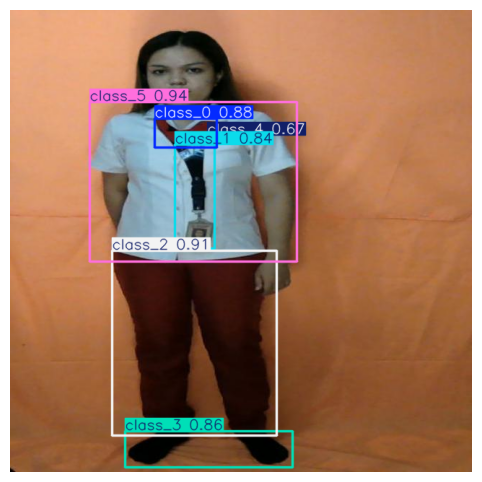

In [ ]:
test_image = "/content/drive/MyDrive/school/test/images/WIN_20230503_20_06_21_Pro-2-_jpg.rf.05440e4992cb991920e1311b303a9f41.jpg"  # Update your test image path

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Run inference
results = model.predict(test_image, save=True, conf=0.5)

# Show results
import cv2
import matplotlib.pyplot as plt

for r in results:
    img = r.plot()  # Bounding boxes draw karega
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [ ]:
# Export trained model to ONNX format
model.export(format="onnx")
print("✅ Model exported to ONNX format!")


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.53', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 8.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.53...
ONNX: export success ✅ 9.9s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (10.3s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo va

In [ ]:
from ultralytics import YOLO

# Load trained YOLOv8 model
model = YOLO("runs/detect/train/weights/best.pt")

# Export model in ONNX format (for Flask inference)
model.export(format="onnx")

# Export model in TorchScript format (alternative)
model.export(format="torchscript")

print("✅ Model exported successfully!")


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.53...
ONNX: export success ✅ 1.0s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (1.6s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/content/newdata.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/dete

In [ ]:
from google.colab import files

# YOLOv8 trained model download (best.pt)
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>